In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels.api as sm
import matplotlib

import sys
import os

# Local imports
src_dir = os.path.abspath('../')
os.chdir(src_dir)
sys.path.append(src_dir)
from config import *

# Matplotlib settings
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

In [2]:
excel_data_file_name = 'Superstore.xls'
df = pd.read_excel(os.path.join(DATA_DIR, excel_data_file_name))
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7916,7917,CA-2015-110891,2015-11-20,2015-11-24,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Philadelphia,...,19140,East,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",344.372,4,0.3,-93.4724
3741,3742,CA-2016-137848,2016-01-15,2016-01-21,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,10011,East,OFF-EN-10001137,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4,0.0,7.5992
8771,8772,CA-2017-115882,2017-09-14,2017-09-17,First Class,DB-13555,Dorothy Badders,Corporate,United States,Raleigh,...,27604,South,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,942.784,4,0.2,94.2784
2075,2076,CA-2014-131051,2014-12-01,2014-12-05,Standard Class,TR-21325,Toby Ritter,Consumer,United States,San Francisco,...,94122,West,FUR-FU-10001861,Furniture,Furnishings,"Floodlight Indoor Halogen Bulbs, 1 Bulb per Pa...",58.200,3,0.0,28.5180
2410,2411,CA-2014-162684,2014-08-01,2014-08-06,Standard Class,AS-10630,Ann Steele,Home Office,United States,Philadelphia,...,19120,East,OFF-FA-10000992,Office Supplies,Fasteners,"Acco Clips to Go Binder Clips, 24 Clips in Two...",5.680,2,0.2,1.9170


In [4]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [7]:
y = furniture['Sales'].resample('MS').mean()

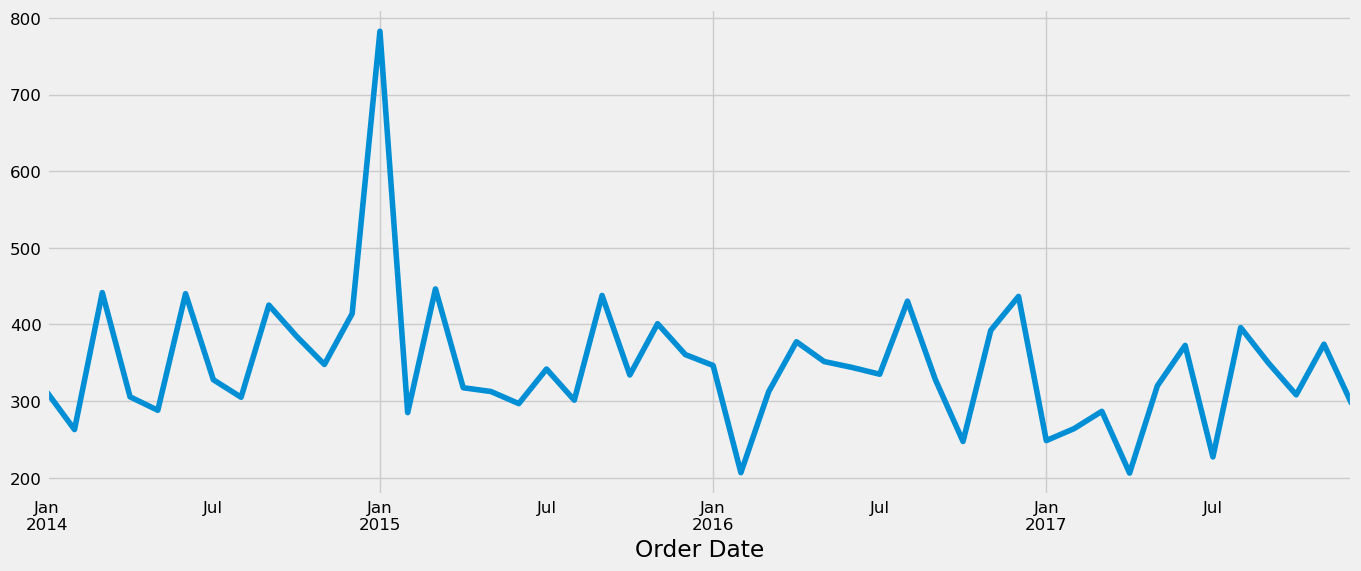

In [8]:
y.plot(figsize=(15, 6))
plt.show()

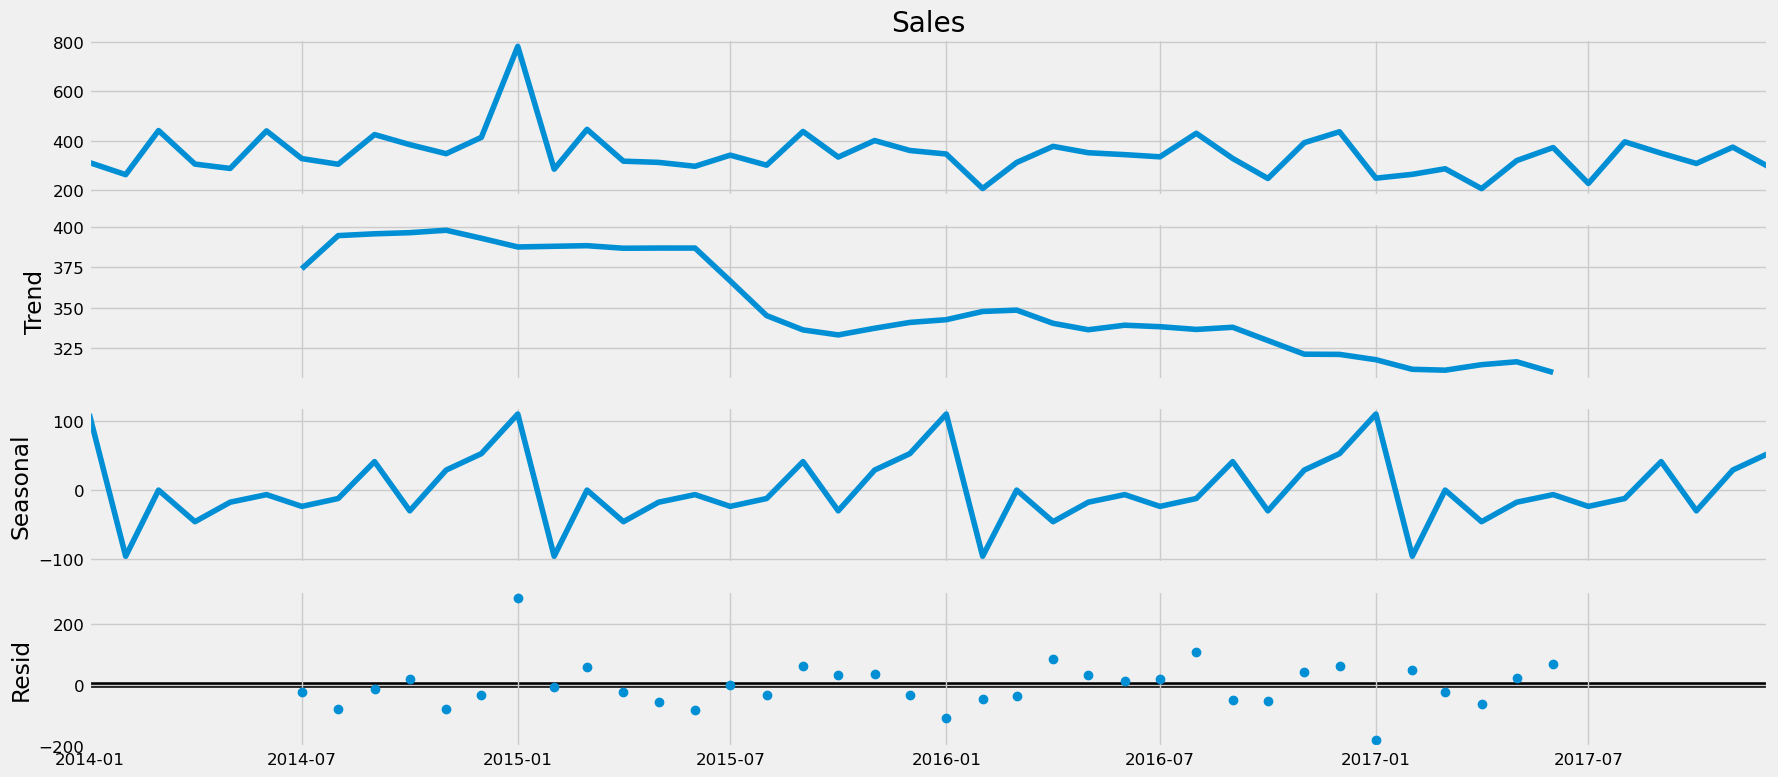

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -122.321
Date:                            Sun, 08 Sep 2024   AIC                            254.642
Time:                                    16:39:30   BIC                            259.865
Sample:                                01-01-2014   HQIC                           255.776
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1886      0.314     -0.601      0.548      -0.803       0.426
ma.L1         -1.0000      0.447     -2.237      0.025      -1.876      -0.124
ar.S.L12      -0.0011      0.366     -0.003      0.998      -0.719       0.717
ma.S.L12      -0.0668      0.406     -0.164      0.869      -0.863       0.729
sigma2      6417.3128   6.97e-05   9.21e+07      0.000    6417.313    6417.313
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.82   Prob(JB):                         0.65
Heteroskedasticity (H):               0.49   Skew:                            -0.24
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.7e+23. Standard errors may be unstable.
"""

In [31]:
best_aic = np.inf
best_params = None
best_seasonal_params = None

warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            # enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:702.6705312928079
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1810.7800074793604
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:453.97537874517474
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:445.70342838007895
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:628.5073497924994
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1698.7120643189305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:449.85654362896156
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:447.6654317240236
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:668.1480179335385
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1853.767185098238
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:455.46079304151624
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:447.6052341714685
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:623.1645142919439
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1665.008296901975
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:451.7948630420454
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:449.5456441124988
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:592.3531323020196
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1665.9769659019396
ARI

In [33]:
print('Best model: ARIMA{}x{}12 - AIC:{}'.format(best_params, best_seasonal_params, best_aic))

Best model: ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:438.08244547298744


In [28]:
best_seasonal_params

(0, 1, 1, 12)

In [34]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_params,
                                seasonal_order=best_seasonal_params,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1897.570     -0.001      1.000   -3720.169    3718.169
ma.S.L12      -1.0000   1897.637     -0.001      1.000   -3720.299    3718.299
sigma2      7504.4494      0.181   4.15e+04      0.000    7504.095    7504.804


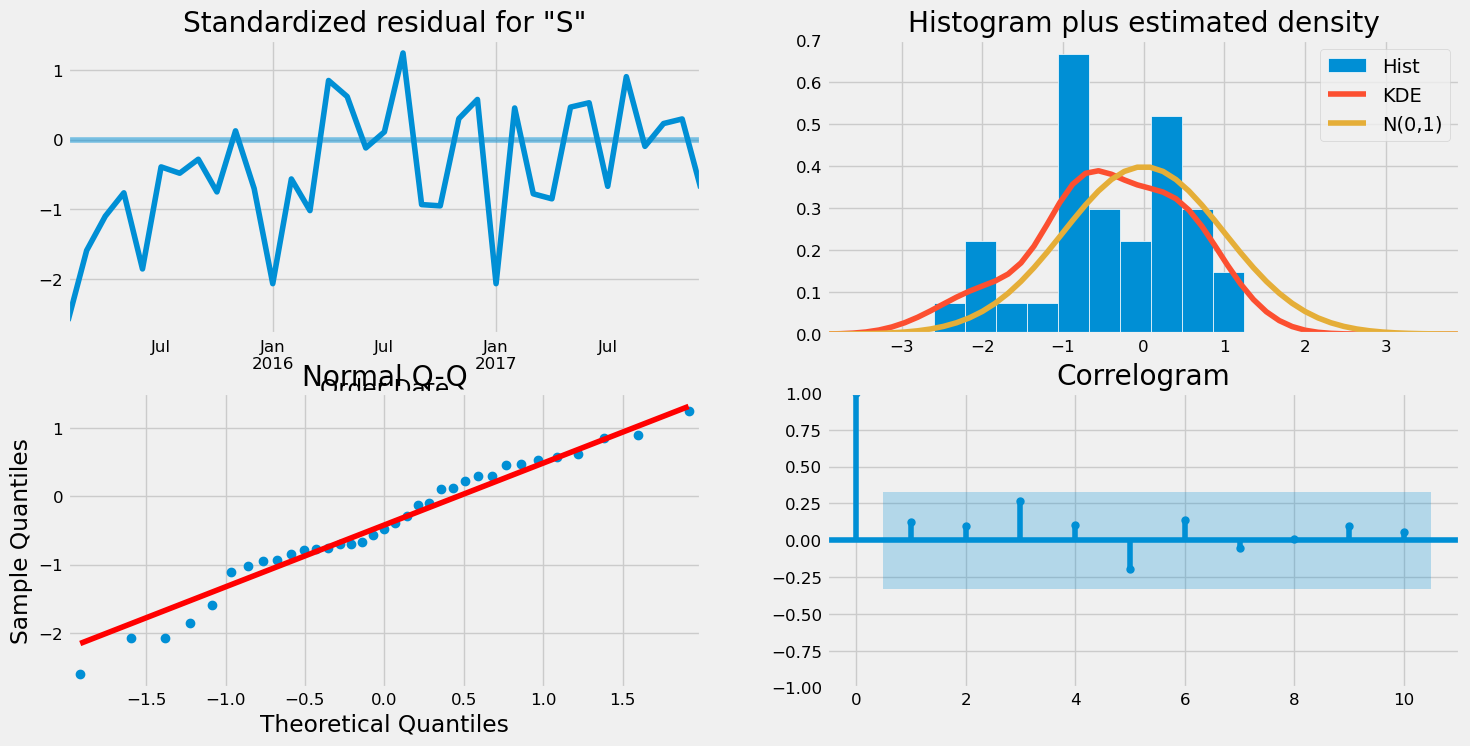

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

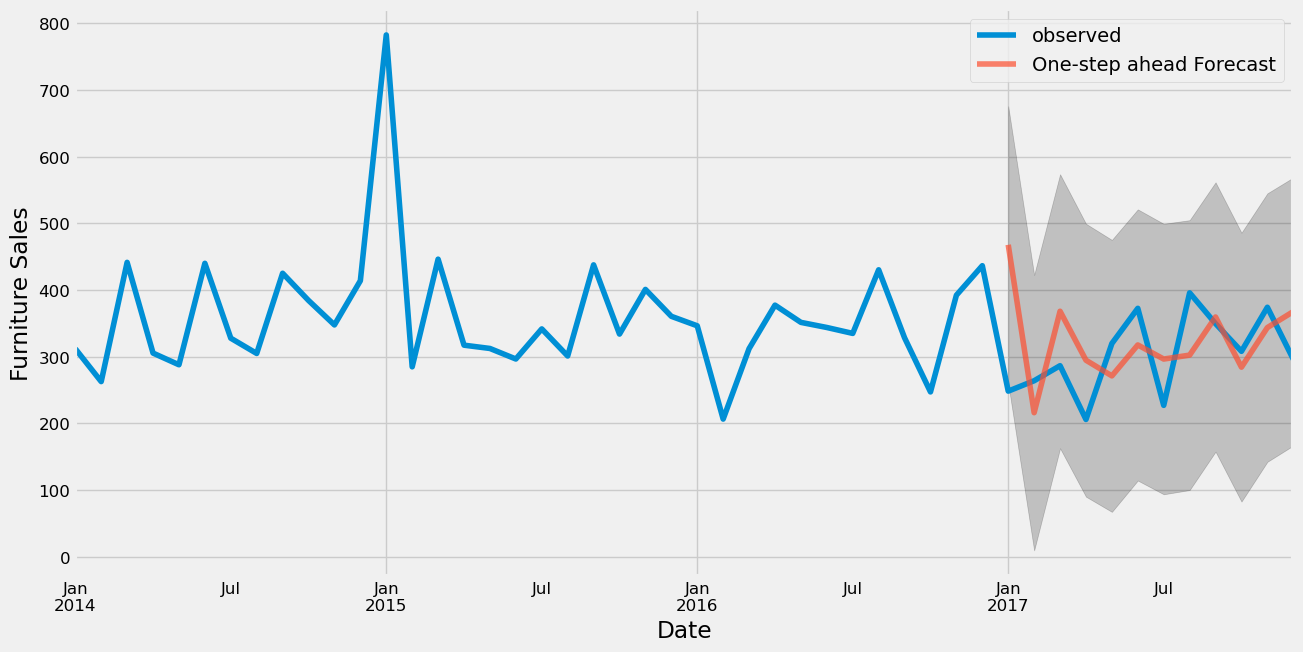

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [37]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7555.04


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 86.92


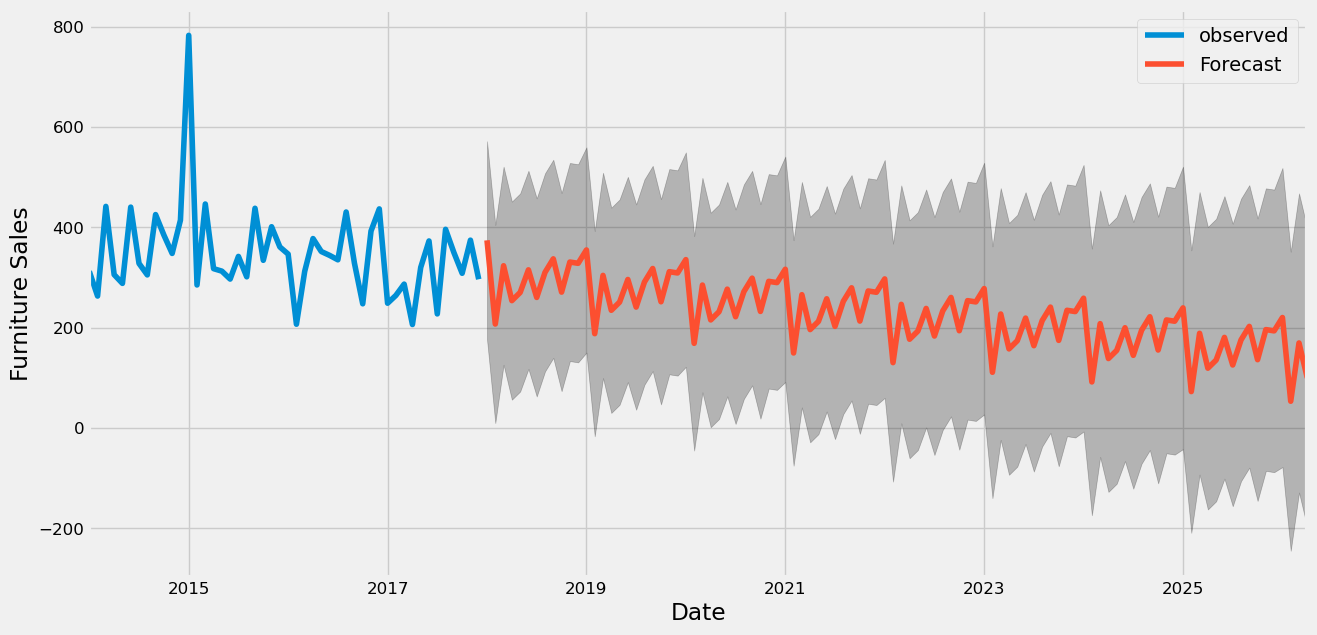

In [39]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()